<a href="https://colab.research.google.com/github/vadan2r/metricas-avaliacao-aprendizado/blob/main/Metrica_avaliacao_aprendizagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz de Confusão:
[[4 1]
 [1 4]]

Valores Extraídos:
VP: 4
VN: 4
FP: 1
FN: 1
Total de Elementos (N): 10
Métricas de Avaliação:
Sensibilidade (Recall): 0.8
Especificidade: 0.8
Acurácia: 0.8
Precisão: 0.8
F-score: 0.8000000000000002


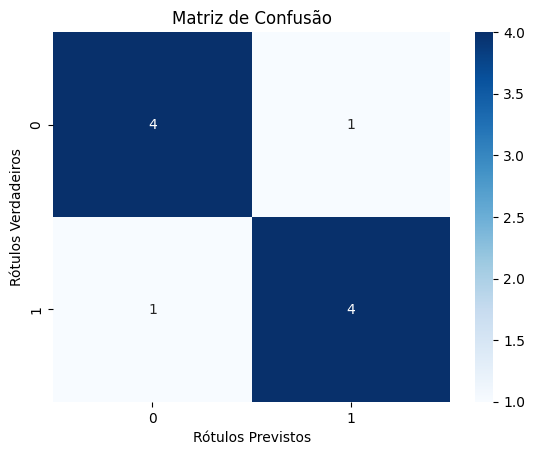

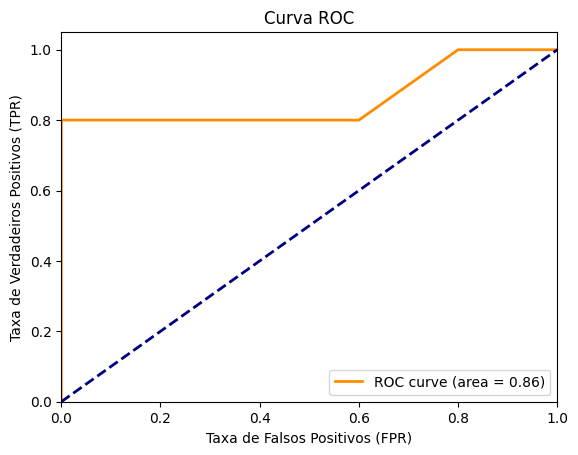

In [9]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns #para plotar a matriz de confusão de forma mais bonita

# Dados simulados (ou os resultados do seu modelo)
y_verdadeiro = np.array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0])  # Valores reais
y_previsto   = np.array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0])  # Valores previstos PELO MODELO (depois de aplicar um threshold)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_verdadeiro, y_previsto)

# Extrair os valores da matriz
VP = matriz_confusao[1, 1]
VN = matriz_confusao[0, 0]
FP = matriz_confusao[0, 1]
FN = matriz_confusao[1, 0]

print("Matriz de Confusão:")
print(matriz_confusao)
print("\nValores Extraídos:")
print("VP:", VP)
print("VN:", VN)
print("FP:", FP)
print("FN:", FN)

# Calcular o total de elementos (N)
N = VP + VN + FP + FN
print("Total de Elementos (N):", N)

# Calcular as métricas
sensibilidade = VP / (VP + FN)
especificidade = VN / (FP + VN)
acuracia = (VP + VN) / N
precisao = VP / (VP + FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

# Imprimir os resultados
print("Métricas de Avaliação:")
print("Sensibilidade (Recall):", sensibilidade)
print("Especificidade:", especificidade)
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("F-score:", f_score)

# Visualizar a Matriz de Confusão (opcional, mas recomendado)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues') #fmt='d' garante que apareçam números inteiros
plt.title('Matriz de Confusão')
plt.ylabel('Rótulos Verdadeiros')
plt.xlabel('Rótulos Previstos')
plt.show()

# Simular probabilidades previstas (substitua isso com as saídas REAIS do seu modelo)
# Assumindo que você tenha as probabilidades para cada amostra
y_probabilidades = np.array([0.9, 0.2, 0.1, 0.3, 0.8, 0.6, 0.7, 0.4, 0.9, 0.2]) # Substitua esses valores!
fpr, tpr, thresholds = metrics.roc_curve(y_verdadeiro, y_probabilidades)
roc_auc = metrics.auc(fpr, tpr)

# Plotar a Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()